## Задача 5

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [51]:
exam_df = pd.read_excel('exam_results.xls')
exam_df.drop(columns=['Номер', 'ИО'], inplace=True)
exam_df.columns = ['Surname', 'Score']
exam_df.head()

,Surname,Score
0,Репенкова,16
1,Ролдугина,0
2,Сафина,19
3,Сидоров,26
4,Солоухин,21


In [52]:
def first_letter(surname):
    if surname[0].lower() in vowels:
        return True
    return False

In [53]:
# Для начала разделим данные таблицы по фамилиям, начинающимся с гласной и согласной букв
vowels = {'а', 'е', 'ё', 'и', 'о', 'у', 'ы', 'э', 'ю', 'я'}

In [54]:
# Зададим уровень значимости
alpha = 0.05

# Выделим выборки
vowels_cond = np.vectorize(first_letter)(exam_df['Surname'])
C = exam_df[~vowels_cond]
V = exam_df[vowels_cond]

In [55]:
exam_med = exam_df['Score'].median()
med_cond = exam_df['Score'] > exam_med

first_cond = med_cond & ~vowels_cond
second_cond = med_cond & vowels_cond
third_cond = ~med_cond & ~vowels_cond
fourth_cond = ~med_cond & vowels_cond

In [56]:
exam_table = pd.DataFrame(
    data=[[first_cond.sum(), second_cond.sum()], [third_cond.sum(), fourth_cond.sum()]],
    columns=['con', 'vow'],
    index=['>med', '<=med']
)

exam_table

,con,vow
>med,145,21
<=med,138,28


__а)__

__1.__ Построим Д.И.

In [57]:
 # Найдем критическое значение
z_crit = sts.norm.ppf(1 - alpha / 2)
print(f'z_crit = {z_crit}')

# Посчитаем все необходимые значения
n_V_plus, n_V = 21, 21 + 28
p_V_hat = n_V_plus / n_V


n_C_plus, n_C = 145, 145 + 138
p_C_hat = n_C_plus / n_C


OR_hat = (p_V_hat / (1 - p_V_hat)) / (p_C_hat / (1 - p_C_hat))
se_ln_OR_hat = np.sqrt(1 / ((1 - p_V_hat) * p_V_hat * n_V) + 1 / ((1 - p_C_hat) * p_C_hat * n_C))

z_crit = 1.959963984540054


In [58]:
# Построим Д.И.
q_l = np.exp(np.log(OR_hat) - z_crit * se_ln_OR_hat)
q_r = np.exp(np.log(OR_hat) + z_crit * se_ln_OR_hat)
print(f'q_l = {q_l}, q_r = {q_r}')

q_l = 0.3870945958254781, q_r = 1.3162172761513564


__2.__ Проверим гипотезу о том, что отношение шансов равно 1 и найдем P-значение

In [59]:
# Посчитаем наблюдаемую статистику
z_obs = (np.log(OR_hat) - 0) / se_ln_OR_hat
z_obs

-1.0799144576000155

In [60]:
# Наблюдаемое значение меньше критического по модулю
np.abs(z_obs) < z_crit

True

In [61]:
# Найдем p-value, равное двум значениям функции распределения стандартной нормальной с.в. в точке -z_obs
p_value = 2 * sts.norm.cdf(z_obs)
p_value

0.280180274566451

__Вывод:__ Видим, что гипотеза о том, что отношение шансов равно 1, не отвергается, так как наблюдаемое значение по модулю не превышает критического, что согласуется с тем, что p-value больше уровня значимости.

__б)__

__1.__ Построим Д.И.

In [62]:
# Найдем критическое значение
z_crit = sts.norm.ppf(1 - alpha / 2)
print(f'z_crit = {z_crit}')

# Посчитаем все необходимые значения
n_V_plus, n_V = 21, 21 + 28
p_V_hat = n_V_plus / n_V


n_C_plus, n_C = 145, 145 + 138
p_C_hat = n_C_plus / n_C


se_ln = np.sqrt((1 - p_V_hat) / (p_V_hat * n_V) + (1 - p_C_hat) / (p_C_hat * n_C))

z_crit = 1.959963984540054


In [63]:
# Построим Д.И.
q_l = np.exp(np.log(p_V_hat) - np.log(p_C_hat) - z_crit * se_ln)
q_r = np.exp(np.log(p_V_hat) - np.log(p_C_hat) + z_crit * se_ln)
print(f'q_l = {q_l}, q_r = {q_r}')

q_l = 0.5937529565040843, q_r = 1.1783586951819993


__2.__ Проверим гипотезу о том, что отношение вероятностей равно 1 и найдем P-значение

In [72]:
# Посчитаем наблюдаемую статистику
z_obs = (np.log(p_V_hat) - np.log(p_C_hat) - 0) / se_ln
z_obs

-1.021337019974948

In [73]:
# Наблюдаемое значение меньше критического по модулю
np.abs(z_obs) < z_crit

True

In [74]:
# Найдем p-value, равное двум значениям функции распределения стандартной нормальной с.в. в точке -z_obs
p_value = 2 * sts.norm.cdf(z_obs)
p_value

0.3070947928050546

__Вывод:__ Видим, что гипотеза о том, что отношение вероятностей равно 1, не отвергается, так как наблюдаемое значение по модулю не превышает критического, что согласуется с тем, что p-value больше уровня значимости.

__в)__

__1.__ Построим Д.И.

In [75]:
# Запишем базовые выборки
C_base_sample = C['Score'].values
V_base_sample = V['Score'].values

In [76]:
np.random.seed(111)

# Сгенерируем бутстрэп-выборки
C_bootstrapped = np.random.choice(C_base_sample, size=(10**4, C_base_sample.shape[0]))
V_bootstrapped = np.random.choice(V_base_sample, size=(10**4, V_base_sample.shape[0]))

In [77]:
def OR_hat_star(C_sample, V_sample):
    p_C_hat_star = (C_sample > exam_med).sum() / len(C_sample)
    p_V_hat_star = (V_sample > exam_med).sum() / len(V_sample)
    
    odds_C_star = p_C_hat_star / (1 - p_C_hat_star)
    odds_V_star = p_V_hat_star / (1 - p_V_hat_star)
    
    return odds_V_star / odds_C_star

In [83]:
# Посчитаем значения OR_hat_star для каждой пары C_i, V_i
OR_hat_stars = np.array([
    OR_hat_star(C_sample, V_sample) for C_sample, V_sample in zip(C_bootstrapped, V_bootstrapped)])

In [84]:
# Построим Д.И.
q_l = np.quantile(OR_hat_stars, q=alpha / 2)
q_r = np.quantile(OR_hat_stars, q=1 - alpha / 2)
print(q_l, q_r)

0.37410071942446055 1.3414965986394556


__2.__ Проверим гипотезу о том, что отношение вероятностей равно 1 и найдем P-значение

In [87]:
# Посчитаем наблюдаемую статистику
n_C_plus, n_C = 145, 145 + 138
p_C_hat = n_C_plus / n_C

n_V_plus, n_V = 21, 21 + 28
p_V_hat = n_V_plus / n_V


OR_hat = (p_V_hat / (1 - p_V_hat)) / (p_C_hat / (1 - p_C_hat))
OR_hat

0.7137931034482758

In [89]:
# Найдем p-value
p_value = 2 * min(np.mean(OR_hat_stars <= 1), np.mean(OR_hat_stars > 1))
p_value

0.2836

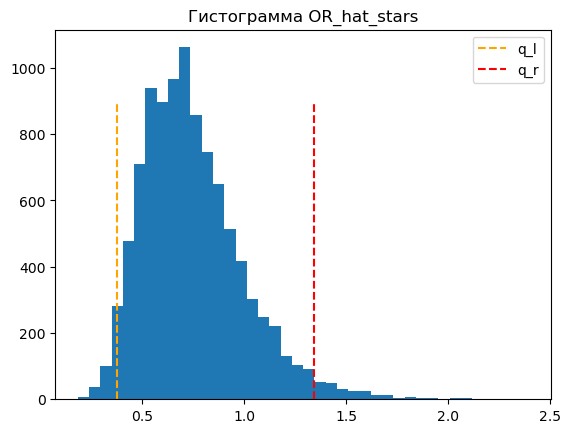

In [81]:
# Построим гистограмму и выделим на ней Д.И.
plt.hist(OR_hat_stars, bins=40)

plt.vlines(q_l, 0, 900, linestyles='dashed', color='orange', label='q_l')
plt.vlines(q_r, 0, 900, linestyles='dashed', color='red', label='q_r')

plt.title('Гистограмма OR_hat_stars')
plt.legend();

__Вывод:__ Видим, что гипотеза о том, что отношение шансов равно 1, не отвергается, так как 1 попадает в Д.И.